In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## FILTRE DES DONNEES

In [4]:
df = pd.read_csv("train.csv")


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [9]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
df.dropna(subset = ["Age", "Embarked"], inplace = True)# supprime les colonnes age et embarked
df["SibSp"] = df["SibSp"] + df["Parch"] # on met les donnees de sibsp et parch dans la meme colonne 
df.rename(columns = {"SibSp" : "Relatives"}, inplace = True)

In [11]:
df.drop(["Name", "Parch", "Cabin","Ticket", "Fare"], axis=1, inplace=True)

In [12]:
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Relatives      0
Embarked       0
dtype: int64


In [13]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Relatives,Embarked
0,1,0,3,male,22.0,1,S
1,2,1,1,female,38.0,1,C
2,3,1,3,female,26.0,0,S
3,4,1,1,female,35.0,1,S
4,5,0,3,male,35.0,0,S


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,Relatives
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.946629
std,258.683191,0.491139,0.836854,14.492933,1.485027
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000
75%,677.250000,1.000000,3.000000,38.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,7.000000


## 2. Qui etaient les passagers ?

<Axes: >

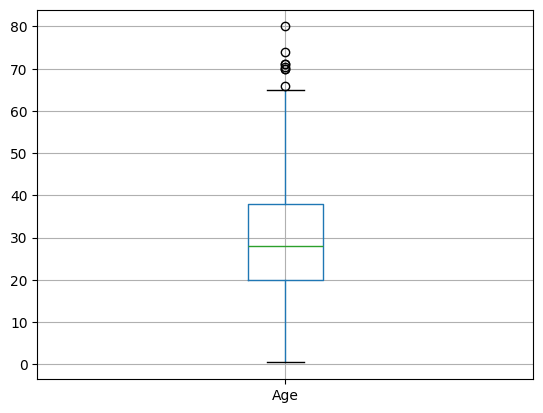

In [15]:
plt.figure()
df.boxplot(column = ["Age"])

dans cette boite a mouscarde on voit qu'il des valeurs aberants
une valeur est concideré comme aberant si 
> quartile sup + 1,5 * ecart interquartile
< quartile inf -1,5 * ecart interquartile


In [18]:
df_men = df[(df["Sex"]== "male") & (df["Age"] >= 18)]
df_women = df[(df["Sex"]== "female") & (df["Age"] >= 18)]
df_children = df[df["Age"] < 18]


In [23]:
print(df_men["Sex"].value_counts())

Sex
male    395
Name: count, dtype: int64


In [19]:
plt.style.use("bmh")

###### CREATION D'UN GRAPHIQUE EN BATONNE

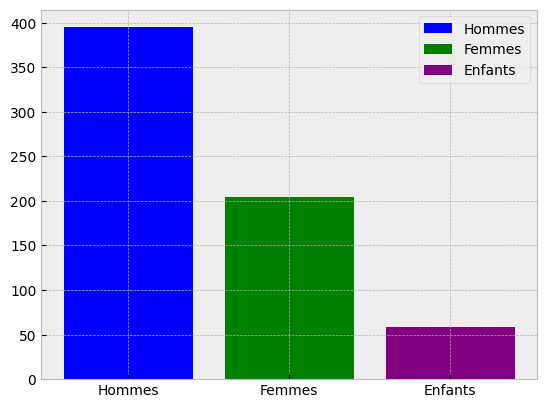

In [25]:
colors = ["blue","green","purple"]
groupes = ["Hommes","Femmes","Enfants"]

plt.figure()

plt.bar(groupes[0], df_men["Sex"].value_counts(), label = groupes[0], color = colors[0])
plt.bar(groupes[1], df_women["Sex"].value_counts(), label = groupes[1], color = colors[1])
plt.bar(groupes[2], df_children["Sex"].value_counts(), label = groupes[2], color = colors[2])
plt.legend(groupes)


Text(0, 0.5, 'Frequence')

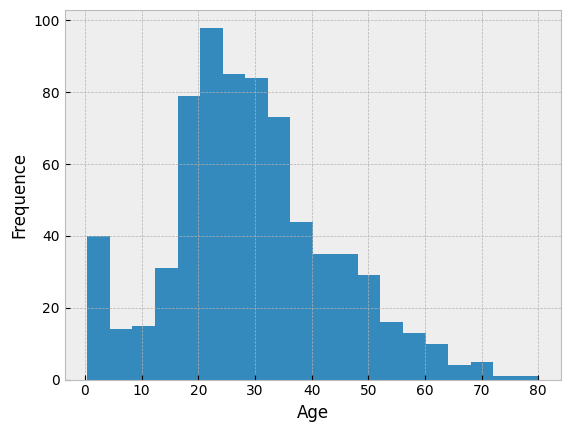

In [26]:
plt.figure()
df["Age"].hist(bins = 20)
plt.xlabel("Age")
plt.ylabel("Frequence")

In [27]:
mean_age = df["Age"].mean()
median_age = df["Age"].median()
mode_age = df["Age"].mode()

print(f"Age moyen = {np.round(mean_age, decimals = 1)} ans")
print(f"Age median = {median_age}")
print(f"Mode = {mode_age}")

Age moyen = 29.6 ans
Age median = 28.0
Mode = 0    24.0
Name: Age, dtype: float64


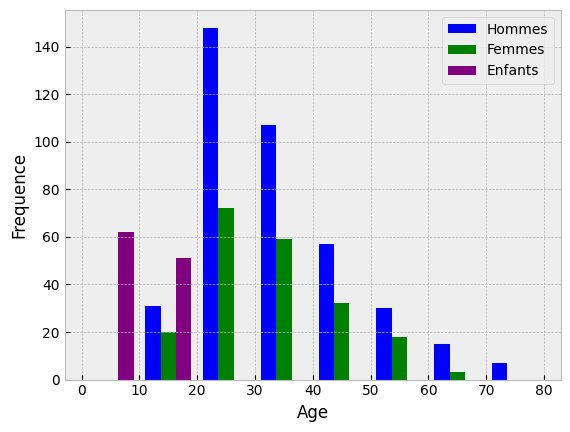

In [31]:
plt.figure()
plt.hist([df_men["Age"], df_women["Age"], df_children["Age"]], bins = [0,10,20,30,40,50,60,70,80,], color = colors)
plt.xlabel("Age")
plt.ylabel("Frequence")
plt.legend(groupes)
#histogramme pour evaluer les tranches d'ages des personnes presents dans le bateau

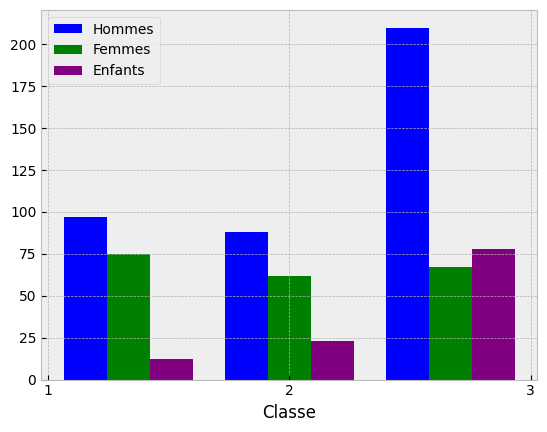

In [43]:
plt.figure()
plt.hist([df_men["Pclass"], df_women["Pclass"], df_children["Pclass"]], bins = 3, color = colors)
plt.xticks([1,2,3])
plt.xlabel("Classe")
plt.legend(groupes)

Es qu'il y a un lien entre le ville d'embarquement et type de classe

In [41]:
print(df["Embarked"])

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
886    S
887    S
889    C
890    Q
Name: Embarked, Length: 712, dtype: object


In [38]:
df["Embarked"].info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
712 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [40]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

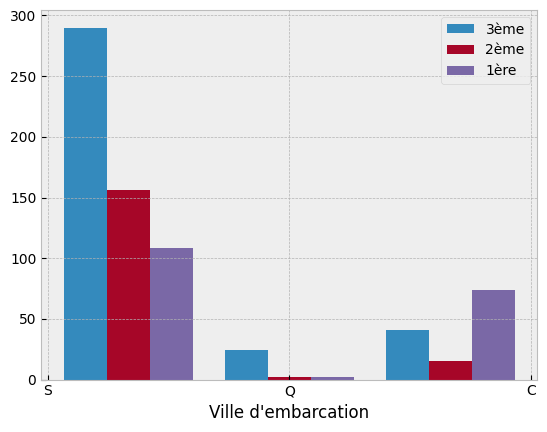

In [51]:
plt.figure()
plt.hist([ df[df["Pclass"]==3]["Embarked"] , df[df["Pclass"]==2]["Embarked"], df[df["Pclass"]==1]["Embarked"]], bins = 3)
plt.xlabel("Ville d'embarcation")
plt.legend(["3ème", "2ème", "1ère"])

Es ce que les personnes ont voyagés seul ou en famille ?

In [52]:
df["Relatives"].unique()

array([1, 0, 4, 2, 6, 5, 3, 7], dtype=int64)

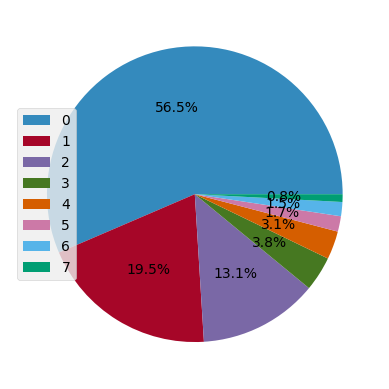

In [61]:
plt.figure()
plt.pie(df["Relatives"].value_counts(), autopct = "%.1f%%")
plt.legend(["0", "1", "2", "3", "4", "5", "6", "7"], loc="center left")

Le paramètre optionnel autopct de la méthode pie() permet d'afficher les pourcentages relatifs à chaque secteur sur le graphique

## 3.Facteurs survie ?

In [65]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Relatives',
       'Embarked'],
      dtype='object')

In [66]:
df["Survived"].unique()

array([0, 1], dtype=int64)

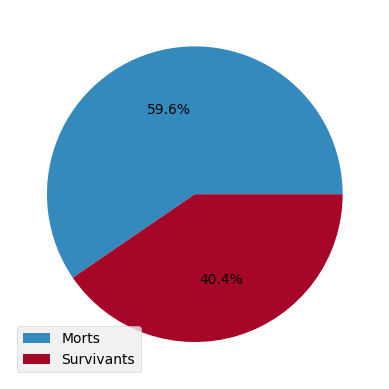

In [69]:
plt.figure()
plt.pie(df["Survived"].value_counts(), autopct = "%.1f%%")
plt.legend(["Morts","Survivants"])

La méthode groupby() permet de grouper notre dataframe selon les valeurs possibles d'une colonne du dataframe